In [73]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import matplotlib.ticker as plticker
from matplotlib.axis import Tick


sns.kdeplot(df2,x="Sensor_noise",hue="Iteration")
plt.axvline(x=mat["all_ground_truth"][nexp][1][0][1], color="red")
plt.savefig('evol_sensor_noise_bosmos_exp2.png')

sns.kdeplot(df3,x="Sensor_noise",hue="Iteration")
plt.axvline(x=mat["all_ground_truth"][nexp][1][0][1], color="red")
plt.savefig('evol_sensor_noise_minebed_exp2.png')

In [74]:
plt.style.use('seaborn')

#number of the experiment
exp=25
minebed_exp=exp
bosmos_exp=exp % 5

# Prepare BOSMOS
bosmos_mat = scipy.io.loadmat('sp-' + str(exp - exp % 5)+ '-' + str(exp - exp % 5 +5) + '.mat')
bosmos_posteriors=bosmos_mat["posterior_trajectories"]
bosmos_posteriors=np.delete(bosmos_posteriors, 1, 1)


# Prepare MINEBED
minebed_mat = scipy.io.loadmat('minebed-' + str(minebed_exp) + '-' + str(minebed_exp+1) +'.mat')
minebed_posteriors=minebed_mat["posterior_trajectories"][0]
minebed_posteriors=np.delete(minebed_posteriors, 1, 0)

trials_labels = ['1', '4', '20', '100']

if bosmos_mat["true_models"][exp+1][0] == 'SignalDetection'[0]:
        npar1=0
        npar2=1
elif bosmos_mat["true_models"][exp+1][0] == 'ProbabilityRatio'[0]:
        npar1=2
        npar2=3
        raise ValueError
true_x = bosmos_mat["all_ground_truth"][bosmos_exp][1][0][1]
true_y = bosmos_mat["all_ground_truth"][bosmos_exp][1][0][0]

# print('BOSMOS:')
# print(bosmos_posteriors[bosmos_exp])
bosmos_value=np.concatenate([ np.array(x[npar1][1]).flatten() for x in  bosmos_posteriors[bosmos_exp]])
bosmos_valuebis=np.concatenate([ np.array(x[npar2][1]).flatten() for x in  bosmos_posteriors[bosmos_exp]])
bosmos_iteration=np.concatenate( [ [trials_labels[i]]*len( np.array(bosmos_posteriors[bosmos_exp][i][npar1][1]).flatten() ) for i in range(len(trials_labels))] )
bosmos_algorithm=["BOSMOS"]*len(bosmos_value)

# print('MINEBED:')
# print(minebed_posteriors)
minebed_value=np.concatenate([ np.array(x[npar1][1]).flatten()  for x in minebed_posteriors])
minebed_valuebis=np.concatenate([ np.array(x[npar2][1]).flatten()  for x in minebed_posteriors])
minebed_iteration=np.concatenate( [ [trials_labels[i]]*len( np.array(minebed_posteriors[i][npar1][1]).flatten() ) for i in range(len(trials_labels))] )
minebed_algorithm=["Minebed"]*len(minebed_value)


bosmos_data = {r'$\theta_{sens}$': bosmos_value,
        r'$\theta_{hit}$': bosmos_valuebis,
        'Trials': bosmos_iteration,
        'Algorithm': bosmos_algorithm
        }
print(bosmos_iteration)
print(len(bosmos_value), len(bosmos_valuebis), len(bosmos_iteration), len(bosmos_algorithm))
# print(len(np.concatenate([bosmos_value])), len(np.concatenate([bosmos_valuebis])), len(np.concatenate([bosmos_iteration])), len(np.concatenate([bosmos_algorithm])))
bosmos_df = pd.DataFrame(bosmos_data)
# bosmos_df = bosmos_df.append({r'$\theta_{sens}$': 0.4, r'$\theta_{hit}$': 4, 'Trials': 4, 'Algorithm': 'BOSMOS'}, ignore_index=True)
# bosmos_df = bosmos_df.append({r'$\theta_{sens}$': 0.4, r'$\theta_{hit}$': 4, 'Trials': 20, 'Algorithm': 'BOSMOS'}, ignore_index=True)
# bosmos_df = bosmos_df.append({r'$\theta_{sens}$': 0.4, r'$\theta_{hit}$': 4, 'Trials': 100, 'Algorithm': 'BOSMOS'}, ignore_index=True)

minebed_data = {r'$\theta_{sens}$': minebed_value,
        r'$\theta_{hit}$': minebed_valuebis,
        'Trials': minebed_iteration,
        'Algorithm': minebed_algorithm
        }
minebed_df = pd.DataFrame(minebed_data)
# minebed_df = minebed_df.append({r'$\theta_{sens}$': 0.4, r'$\theta_{hit}$': 4, 'Trials': 20, 'Algorithm': 'Minebed'}, ignore_index=True)
# minebed_df = minebed_df.append({r'$\theta_{sens}$': 0.4, r'$\theta_{hit}$': 4, 'Trials': 100, 'Algorithm': 'Minebed'}, ignore_index=True)

# print(bosmos_posteriors[bosmos_exp])
print(bosmos_mat["true_models"][exp+1])
print(npar1, npar2)
print(bosmos_mat["all_ground_truth"][bosmos_exp])
print(bosmos_df)
print(minebed_df)

['1' '1' '1' ... '100' '100' '100']
39931 39931 39931 39931
SignalDetection 
0 1
[array(['hit         ', 'sensor_noise', 'lower_thr   ', 'thr_gap     '],
       dtype='<U12')
 array([[6.26159316, 0.58722768, 2.34790158, 3.2830388 ]])]
       $\theta_{sens}$  $\theta_{hit}$ Trials Algorithm
0             0.353468        4.972200      1    BOSMOS
1             0.867921        2.390954      1    BOSMOS
2             0.352292        1.766201      1    BOSMOS
3             0.482298        2.841803      1    BOSMOS
4             0.780984        3.813725      1    BOSMOS
...                ...             ...    ...       ...
39926         0.882091        3.282124    100    BOSMOS
39927         0.246258        2.659230    100    BOSMOS
39928         0.918477        3.244885    100    BOSMOS
39929         0.907505        3.247157    100    BOSMOS
39930         0.947170        3.194681    100    BOSMOS

[39931 rows x 4 columns]
       $\theta_{sens}$  $\theta_{hit}$ Trials Algorithm
0          

/tmp/ipykernel_794559/2425584051.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


/home/alex/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/alex/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/alex/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/alex/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please updat

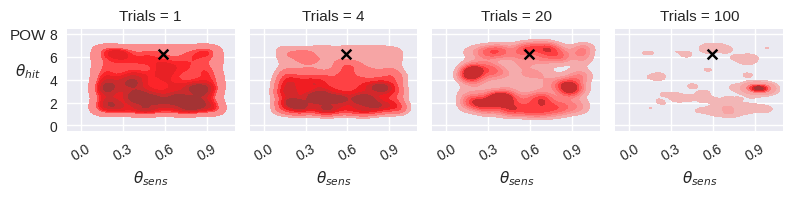

In [75]:
width = 3
height = 2

# sns.color_palette("pastel")
sns.set_color_codes(palette='bright')
 
# Plot BOSMOS
g = sns.FacetGrid(bosmos_df, col='Trials', height=height, aspect=1, xlim=(-0.1,1.1), ylim=(-0.5104534934289062, 8.496 ))
g.map(sns.kdeplot,r'$\theta_{sens}$', r'$\theta_{hit}$',log_scale=[False,False], shade=True, color='r', levels=7)
# g.set_titles(col_template="") # g.add_legend()
for ax in g.axes_dict.values():
    ax.scatter(x=true_x, y=true_y, color='black', marker='x')
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=.3))
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=2))

    ax.set_ylabel('POW\n\n' + r'$\theta_{hit}$', rotation=0, labelpad=15)
    # ax.set_xlim(-0.1,1.1)
    # ax.set_ylim(-0.5104534934289062, 8.496 )
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
plt.savefig('bosmos_joint-' + str(exp) + '-' + bosmos_mat["true_models"][exp+1][0] + '.tiff', dpi=600)


In [76]:
'''# Plot MINEBED
g = sns.FacetGrid(minebed_df, col='Trials', height=height, aspect=1)
g.map(sns.kdeplot, r'$\theta_{sens}$', r'$\theta_{hit}$',log_scale=[False,False], shade=True, color='green', levels=7)
g.add_legend()
for ax in g.axes_dict.values():
    ax.scatter(x=true_x, y=true_y, color='black', marker='x')
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=.3))
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=2))
    # ax.set_xlabel('')

    ax.set_ylabel('POW\n\n' + r'$\theta_{hit}$', rotation=0, labelpad=15)
    ax.set_xlim(-0.1,1.1)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    print(ax.get_ylim())
plt.savefig('minebed_joint-' + str(exp) + '-' + bosmos_mat["true_models"][exp+1][0] + '.tiff', dpi=600)
'''

'# Plot MINEBED\ng = sns.FacetGrid(minebed_df, col=\'Trials\', height=height, aspect=1)\ng.map(sns.kdeplot, r\'$\theta_{sens}$\', r\'$\theta_{hit}$\',log_scale=[False,False], shade=True, color=\'green\', levels=7)\ng.add_legend()\nfor ax in g.axes_dict.values():\n    ax.scatter(x=true_x, y=true_y, color=\'black\', marker=\'x\')\n    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=.3))\n    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=2))\n    # ax.set_xlabel(\'\')\n\n    ax.set_ylabel(\'POW\n\n\' + r\'$\theta_{hit}$\', rotation=0, labelpad=15)\n    ax.set_xlim(-0.1,1.1)\n    for tick in ax.get_xticklabels():\n        tick.set_rotation(30)\n    print(ax.get_ylim())\nplt.savefig(\'minebed_joint-\' + str(exp) + \'-\' + bosmos_mat["true_models"][exp+1][0] + \'.tiff\', dpi=600)\n'